# Data Feature Extraction, 
# Choosing best Model,
# Choosing parameters for Support Vector Machine Model (Titanic)
- https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner

### Contents:
1. Import Necessary Libraries
2. Read In and Explore the Data
3. Data Analysis
4. Data Visualization
5. Cleaning Data
6. Choosing the Best Model
7. Creating Submission File

# 1. Import Necessary Libraries
First off, we need to import several Python libraries such as numpy, pandas, matplotlib and seaborn.

In [17]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
import os

# 2. Read in and Explore the Data 
It's time to read in our training and testing data using `pd.read_csv`, and take a first look at the training data using the `describe()` function.

In [3]:
#import train and test CSV files
train = pd.read_csv("C:/Users/Alicia/Desktop/titanic/data/train.csv")
test = pd.read_csv("C:/Users/Alicia/Desktop/titanic/data/test.csv")

# 3. Data Analysis
We're going to consider the features in the dataset and how complete they are. 

In [9]:
#get a list of the features within the dataset
print(train.columns)
print(train.shape)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(891, 12)


In [10]:
#see a sample of the dataset to get an idea of the variables
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E40,C
640,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S


* **Numerical Features:** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
* **Categorical Features:** Survived, Sex, Embarked, Pclass
* **Alphanumeric Features:** Ticket, Cabin

#### What are the data types for each feature?
* Survived: int
* Pclass: int
* Name: string
* Sex: string
* Age: float
* SibSp: int
* Parch: int
* Ticket: string
* Fare: float
* Cabin: string
* Embarked: string

Now that we have an idea of what kinds of features we're working with, we can see how much information we have about each of them.


In [11]:
#see a summary of the training dataset
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Daly, Mr. Eugene Patrick",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Some Observations:
* There are a total of 891 passengers in our training set.
* The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps. 
* The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.
* The Embarked feature is missing 0.22% of its values, which should be relatively harmless.

In [67]:
#check for any other unusable values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


We can see that except for the abovementioned missing values, no NaN values exist.

### Some Predictions:
* Sex: Females are more likely to survive.
* SibSp/Parch: People traveling alone are more likely to survive.
* Age: Young children are more likely to survive.
* Pclass: People of higher socioeconomic class are more likely to survive.

In [12]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Davidson, Mrs. Thornton (Orian Hays)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [13]:
test.shape

(418, 11)

# 4. Data Visualization
It's time to visualize our data so we can see whether our predictions were accurate! 

### Sex Feature

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


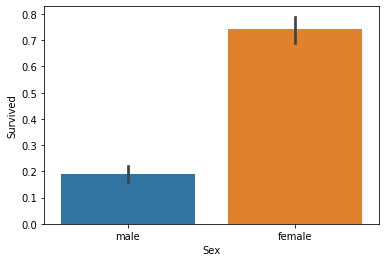

In [68]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

As predicted, females have a much higher chance of survival than males. The Sex feature is essential in our predictions.

### Pclass Feature

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


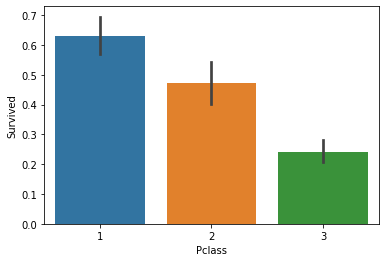

In [69]:
#draw a bar plot of survival by Pclass # ticket class
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

As predicted, people with higher socioeconomic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)

### SibSp Feature

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


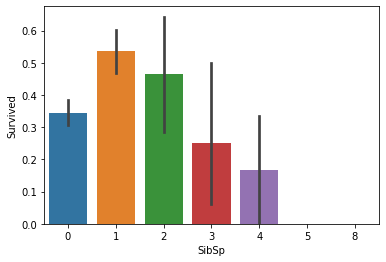

In [70]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)

### Parch Feature

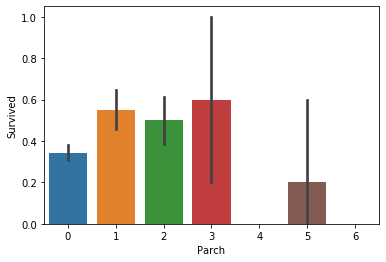

In [71]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

### Age Feature

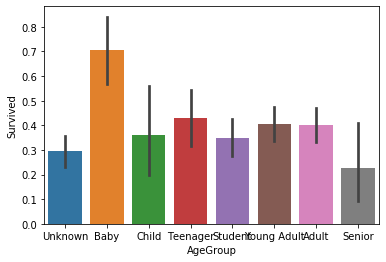

In [72]:
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels) 
# segment and sort data values into bins, ages to groups of age ranges

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Babies are more likely to survive than any other age group. 

### Cabin Feature
I think the idea here is that people with recorded cabin numbers are of higher socioeconomic class, and thus more likely to survive. Thanks for the tips, [@salvus82](https://www.kaggle.com/salvus82) and [Daniel Ellis](https://www.kaggle.com/dellis83)!

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


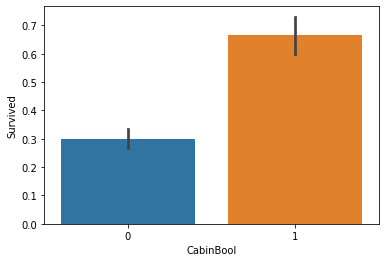

In [73]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int')) # cabin number, missing 77.1% values

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

In [74]:
train.head() #new age group labels based on pd.cut (ages into ranges of age groups)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0


People with a recorded Cabin number are, in fact, more likely to survive. (66.6% vs 29.9%)

# 5. Cleaning Data
Time to clean our data to account for missing values and unnecessary information!

### Looking at the Test Data
Let's see how our test data looks!

In [75]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Karnes, Mrs. J Frank (Claire Bennett)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


* We have a total of 418 passengers.
* 1 value from the Fare feature is missing.
* Around 20.5% of the Age feature is missing, we will need to fill that in.

### Cabin Feature

In [76]:
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1) # cabin number, missing 77.1% values

### Ticket Feature

In [77]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1) # ticket numbers

### Embarked Feature

In [78]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


It's clear that the majority of people embarked in Southampton (S). Let's go ahead and fill in the missing values with S.

In [79]:
#replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})

### Age Feature

Next we'll fill in the missing values in the Age feature. Since a higher percentage of values are missing, it would be illogical to fill all of them with the same value (as we did with Embarked). Instead, let's try to find a way to predict the missing ages. 

In [80]:
#create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [81]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [82]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


The code I used above is from [here](https://www.kaggle.com/startupsci/titanic-data-science-solutions). Next, we'll try to predict the missing Age values from the most common age for their Title.

In [83]:
# fill missing age with mode age group for each title

# mode is the category of agegroup that keeps appearing

# title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult
# print('the modes are', mr_age, miss_age, mrs_age, master_age, royal_age, rare_age)

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

# age group: 
# bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
# labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior'
#            0          1       2        3            4          5              6       7

# print('len is:', len(train["AgeGroup"])) 
for x in range(len(train["AgeGroup"])): # len is: 891, scrolling through each index of dataset
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]] 
# since train["Title"] are alr mapped to numeric values, we can map agegroup of unknowns to titles
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

Now that we've filled in the missing values at least *somewhat* accurately (I will work on a better way for predicting missing age values), it's time to map each age group to a numerical value.

In [84]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

print(train.head())

#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  AgeGroup  CabinBool  Title  
0      0   7.2500        S         4          0      1  
1      0  71.2833        C         6          1      3  
2      0   7.9250        S         5          0      2  
3      0  53.1000        S         5          1      3  
4      0   8.0500        S         

### Name Feature
We can drop the name feature now that we've extracted the titles.

In [85]:
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

### Sex Feature

In [86]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4,0,1
1,2,1,1,1,1,0,71.2833,C,6,1,3
2,3,1,3,1,0,0,7.9250,S,5,0,2
3,4,1,1,1,1,0,53.1000,S,5,1,3
4,5,0,3,0,0,0,8.0500,S,5,0,1


### Embarked Feature

In [87]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4,0,1
1,2,1,1,1,1,0,71.2833,2,6,1,3
2,3,1,3,1,0,0,7.9250,1,5,0,2
3,4,1,1,1,1,0,53.1000,1,5,1,3
4,5,0,3,0,0,0,8.0500,1,5,0,1


### Fare Feature
It's time separate the fare values into some logical groups as well as filling in the single missing value in the test dataset.

In [88]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [89]:
#check train data
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4,0,1,1
1,2,1,1,1,1,0,2,6,1,3,4
2,3,1,3,1,0,0,1,5,0,2,2
3,4,1,1,1,1,0,1,5,1,3,4
4,5,0,3,0,0,0,1,5,0,1,2


In [90]:
train_features = train
train_features.to_csv('train_features.csv', index=False) 
# final form of train data after data pre-processing, as above code shows (numerial features)

In [91]:
#check test data
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5,0,1,1
1,893,3,1,1,0,1,6,0,3,1
2,894,2,0,0,0,3,7,0,1,2
3,895,3,0,0,0,1,5,0,1,2
4,896,3,1,1,1,1,4,0,3,2


In [92]:
test_features = test
test_features.to_csv('test_features.csv', index=False)

In [93]:
test_features.head() # same form of features (numerical) as train data, filled in information

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5,0,1,1
1,893,3,1,1,0,1,6,0,3,1
2,894,2,0,0,0,3,7,0,1,2
3,895,3,0,0,0,1,5,0,1,2
4,896,3,1,1,1,1,4,0,3,2


# 6. Data Features Extraction complete

After importing libraries, we make use of train and test files already in the form of extracted features

In [14]:
#skip to here

#import train and test CSV files
train = pd.read_csv("C:/Users/Alicia/Desktop/titanic/train_features.csv")
test = pd.read_csv("C:/Users/Alicia/Desktop/titanic/test_features.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4,0,1,1
1,2,1,1,1,1,0,2,6,1,3,4
2,3,1,3,1,0,0,1,5,0,2,2
3,4,1,1,1,1,0,1,5,1,3,4
4,5,0,3,0,0,0,1,5,0,1,2


In [5]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5,0,1,1
1,893,3,1,1,0,1,6,0,3,1
2,894,2,0,0,0,3,7,0,1,2
3,895,3,0,0,0,1,5,0,1,2
4,896,3,1,1,1,1,4,0,3,2


# 7. Choosing the Best Model

### Splitting the Training Data
We will use part of our training data (22% in this case) to test the accuracy of our different models.

In [15]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [16]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(694, 9)
(197, 9)
(694,)
(197,)


In [7]:
predictors.head()

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,3,0,1,0,1,4,0,1,1
1,1,1,1,0,2,6,1,3,4
2,3,1,0,0,1,5,0,2,2
3,1,1,1,0,1,5,1,3,4
4,3,0,0,0,1,5,0,1,2


In [8]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Testing Different Models
I will be testing the following models with my training data (got the list from [here](http://https://www.kaggle.com/startupsci/titanic-data-science-solutions)):
* Gaussian Naive Bayes
* Logistic Regression
* Support Vector Machines
* Perceptron
* Decision Tree Classifier
* Random Forest Classifier
* KNN or k-Nearest Neighbors
* Stochastic Gradient Descent
* Gradient Boosting Classifier

For each model, we set the model, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy.

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

K-fold cross validation, from
https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

In [72]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.68


In [73]:
# K-fold cross validation
scores = cross_val_score(gaussian, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_gaussian = scores.mean()

Scores: [0.77142857 0.74285714 0.77142857 0.8        0.75714286 0.75362319
 0.79710145 0.79710145 0.86956522 0.82352941]
Mean: 0.7883777858969675
Standard Deviation: 0.03597846551192398


In [74]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.19


In [75]:
# K-fold cross validation
scores = cross_val_score(logreg, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_logreg = scores.mean()

Scores: [0.8        0.78571429 0.8        0.84285714 0.82857143 0.8115942
 0.79710145 0.79710145 0.89855072 0.85294118]
Mean: 0.8214431859700403
Standard Deviation: 0.03305341561449731


In [76]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.74


In [77]:
# K-fold cross validation
scores = cross_val_score(svc, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_svc = scores.mean()

Scores: [0.81428571 0.81428571 0.82857143 0.87142857 0.8        0.8115942
 0.79710145 0.82608696 0.86956522 0.86764706]
Mean: 0.8300566313481914
Standard Deviation: 0.027443250915536035


In [78]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

78.68


In [79]:
# K-fold cross validation
scores = cross_val_score(linear_svc, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_linear_svc = scores.mean()

Scores: [0.8        0.77142857 0.8        0.84285714 0.81428571 0.79710145
 0.79710145 0.79710145 0.91304348 0.86764706]
Mean: 0.8200566313481914
Standard Deviation: 0.0402673758525061


In [80]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

78.68


In [81]:
# K-fold cross validation
scores = cross_val_score(perceptron, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_perceptron = scores.mean()

Scores: [0.7        0.61428571 0.82857143 0.81428571 0.81428571 0.84057971
 0.69565217 0.8115942  0.84057971 0.70588235]
Mean: 0.7665716721471199
Standard Deviation: 0.07596986657392364


In [82]:
#Decision Tree 
# this value changes
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

80.2


In [83]:
# K-fold cross validation
scores = cross_val_score(decisiontree, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_decisiontree = scores.mean()

Scores: [0.77142857 0.74285714 0.78571429 0.81428571 0.81428571 0.73913043
 0.79710145 0.7826087  0.71014493 0.80882353]
Mean: 0.776638046522957
Standard Deviation: 0.03376954337877661


In [84]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

80.71


In [85]:
# K-fold cross validation
from sklearn.model_selection import cross_val_score
#randomforest = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(randomforest, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_randomforest = scores.mean()

Scores: [0.8        0.74285714 0.82857143 0.85714286 0.8        0.73913043
 0.79710145 0.76811594 0.7826087  0.79411765]
Mean: 0.7909645597369382
Standard Deviation: 0.03405540372662828


In [86]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

77.66


In [87]:
# K-fold cross validation
scores = cross_val_score(knn, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_knn = scores.mean()

Scores: [0.8        0.77142857 0.87142857 0.88571429 0.78571429 0.76811594
 0.76811594 0.82608696 0.85507246 0.83823529]
Mean: 0.8169912312751189
Standard Deviation: 0.04217937640645587


In [88]:
# Stochastic Gradient Descent 
# this value changes
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

79.7


In [89]:
# K-fold cross validation
scores = cross_val_score(sgd, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_sgd = scores.mean()

Scores: [0.78571429 0.68571429 0.77142857 0.8        0.82857143 0.76811594
 0.75362319 0.55072464 0.84057971 0.70588235]
Mean: 0.7490354402630618
Standard Deviation: 0.08045778279367512


In [90]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.77


In [91]:
# K-fold cross validation
#from sklearn.model_selection import cross_val_score

scores = cross_val_score(gbk, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_gbk = scores.mean()

Scores: [0.77142857 0.81428571 0.8        0.85714286 0.82857143 0.7826087
 0.7826087  0.79710145 0.84057971 0.83823529]
Mean: 0.8112562416270857
Standard Deviation: 0.02748995849851943


Let's compare the accuracies of each model!

In [92]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk],
    'Mean Score': [mean_acc_svc, mean_acc_knn, mean_acc_logreg, 
              mean_acc_randomforest, mean_acc_gaussian, mean_acc_perceptron,mean_acc_linear_svc, 
                   mean_acc_decisiontree, mean_acc_sgd, mean_acc_gbk]})
models.sort_values(by='Mean Score', ascending=False)

# SVM
# Scores: [0.81428571 0.81428571 0.82857143 0.87142857 0.8        0.8115942
# 0.79710145 0.82608696 0.86956522 0.86764706]
# Mean: 0.8300566313481914
# Standard Deviation: 0.027443250915536035 is not bad

,Model,Score,Mean Score
0,Support Vector Machines,82.74,0.830057
2,Logistic Regression,79.19,0.821443
6,Linear SVC,78.68,0.820057
1,KNN,77.66,0.816991
9,Gradient Boosting Classifier,84.77,0.811256
3,Random Forest,80.71,0.790965
4,Naive Bayes,78.68,0.788378
7,Decision Tree,80.20,0.776638
5,Perceptron,78.68,0.766572
8,Stochastic Gradient Descent,79.70,0.749035


In [8]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.74


In [9]:
# K-fold cross validation
scores = cross_val_score(svc, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_svc = scores.mean()

Scores: [0.81428571 0.81428571 0.82857143 0.87142857 0.8        0.8115942
 0.79710145 0.82608696 0.86956522 0.86764706]
Mean: 0.8300566313481914
Standard Deviation: 0.027443250915536035


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

[[107  17]
 [ 17  56]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       124
           1       0.77      0.77      0.77        73

    accuracy                           0.83       197
   macro avg       0.82      0.82      0.82       197
weighted avg       0.83      0.83      0.83       197



In [11]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

# K-fold cross validation
scores = cross_val_score(svclassifier, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_svc = scores.mean()

79.19
Scores: [0.8        0.78571429 0.8        0.84285714 0.81428571 0.8115942
 0.76811594 0.8115942  0.86956522 0.86764706]
Mean: 0.8171373766898065
Standard Deviation: 0.03163682890821788


In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

[[99 25]
 [16 57]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       124
           1       0.70      0.78      0.74        73

    accuracy                           0.79       197
   macro avg       0.78      0.79      0.78       197
weighted avg       0.80      0.79      0.79       197



In [40]:
from sklearn.svm import SVC #NLP, higher order tend to overfit
svclassifier = SVC(kernel='poly', degree=4) # 4 is highest
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

# K-fold cross validation
scores = cross_val_score(svclassifier, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_svc = scores.mean()

83.25
Scores: [0.75714286 0.8        0.78571429 0.84285714 0.77142857 0.7826087
 0.7826087  0.79710145 0.7826087  0.75      ]
Mean: 0.7852070393374742
Standard Deviation: 0.024333792750924524


In [41]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[113  11]
 [ 22  51]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       124
           1       0.82      0.70      0.76        73

    accuracy                           0.83       197
   macro avg       0.83      0.80      0.81       197
weighted avg       0.83      0.83      0.83       197



In [42]:
from sklearn.svm import SVC 
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

# K-fold cross validation
scores = cross_val_score(svclassifier, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_svc = scores.mean()

82.74
Scores: [0.81428571 0.81428571 0.82857143 0.87142857 0.8        0.8115942
 0.79710145 0.82608696 0.86956522 0.86764706]
Mean: 0.8300566313481914
Standard Deviation: 0.027443250915536035


In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[107  17]
 [ 17  56]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       124
           1       0.77      0.77      0.77        73

    accuracy                           0.83       197
   macro avg       0.82      0.82      0.82       197
weighted avg       0.83      0.83      0.83       197



In [46]:
from sklearn.svm import SVC 
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

# K-fold cross validation
scores = cross_val_score(svclassifier, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_svc = scores.mean()

62.94
Scores: [0.61428571 0.61428571 0.61428571 0.61428571 0.61428571 0.60869565
 0.60869565 0.60869565 0.60869565 0.64705882]
Mean: 0.6153270003653637
Standard Deviation: 0.01090059218647225


In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[124   0]
 [ 73   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       124
           1       0.00      0.00      0.00        73

    accuracy                           0.63       197
   macro avg       0.31      0.50      0.39       197
weighted avg       0.40      0.63      0.49       197



# 8. Creating Submission File, Results Analysis
It's time to create a submission.csv file to upload to the Kaggle competition!

In [48]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = svc.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission_try2.csv', index=False)

In [49]:
predictions[0:4]

array([0, 1, 0, 0], dtype=int64)

In [150]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5,0,1,1
1,893,3,1,1,0,1,6,0,3,1
2,894,2,0,0,0,3,7,0,1,2
3,895,3,0,0,0,1,5,0,1,2
4,896,3,1,1,1,1,4,0,3,2


In [19]:
test_results = pd.read_csv("C:/Users/Alicia/Desktop/titanic/test_results_2.csv")

In [10]:
test_results.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand,Survived
0,892,3,0,0,0,3,5,0,1,1,0
1,893,3,1,1,0,1,6,0,3,1,1
2,894,2,0,0,0,3,7,0,1,2,0
3,895,3,0,0,0,1,5,0,1,2,0
4,896,3,1,1,1,1,4,0,3,2,1


In [11]:
test_results.describe(include='all')

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand,Survived
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,0.447368,0.392344,1.464115,4.696172,0.217703,1.755981,2.473684,0.392344
std,120.810458,0.841838,0.481622,0.896760,0.981429,0.685516,1.286728,0.413179,1.058380,1.140292,0.488858
min,892.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,996.250000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,0.000000
50%,1100.500000,3.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,2.000000,0.000000
75%,1204.750000,3.000000,1.000000,1.000000,0.000000,2.000000,6.000000,0.000000,2.000000,3.750000,1.000000
max,1309.000000,3.000000,1.000000,8.000000,9.000000,3.000000,7.000000,1.000000,6.000000,4.000000,1.000000


In [12]:
males = 0
females = 0

for i in test_results["Sex"]:
    if (i == 0):
        males = males +1
    else:
        females = females +1
              
print(males, females) # 266 males, 152 females

266 152


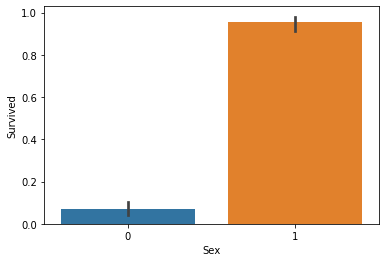

In [13]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=test_results)

#print percentages of females vs. males that survive
#print("Total number survived:"+ str(test_result_original["Survived"].value_counts()))

#print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

In [14]:
survivals = []

count = 0
for i in test_results["Survived"]:
    if (i == 1):
        count = count +1
              
count # 156 of 418 Survived

164

In [15]:
print("Survived No/Yes:\n",test_results["Survived"].value_counts())
print()
print("Survived Female/Male:\n",test_results["Sex"][test_results["Survived"] == 1].value_counts())
print()
print("Not Survived Male/Female:\n",test_results["Sex"][test_results["Survived"] == 0].value_counts())
print()
print("Survived AgeGroup:\n",test_results["AgeGroup"][test_results["Survived"] == 1].value_counts())
print()
print("Not Survived AgeGroup:\n",test_results["AgeGroup"][test_results["Survived"] == 0].value_counts())
# note 1 2 3 4 5 6 7 correspond to 
# bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
# labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
# where unknown is removed. 
# hence, age groups 1 2 3 are below 18, there are 15 + 9 + 13 = 37 of them

Survived No/Yes:
 0    254
1    164
Name: Survived, dtype: int64

Survived Female/Male:
 1    145
0     19
Name: Sex, dtype: int64

Not Survived Male/Female:
 0    247
1      7
Name: Sex, dtype: int64

Survived AgeGroup:
 6    46
4    44
5    31
1    15
3    14
2    10
7     4
Name: AgeGroup, dtype: int64

Not Survived AgeGroup:
 5    122
6     58
4     48
3     15
7      7
2      3
1      1
Name: AgeGroup, dtype: int64


In [20]:
print("Survived SibSp:\n",test_results["SibSp"][test_results["Survived"] == 1].value_counts())
print("Survived Parch:\n",test_results["Parch"][test_results["Survived"] == 1].value_counts())

Survived SibSp:
 0    95
1    62
2     6
3     1
Name: SibSp, dtype: int64
Survived Parch:
 0    101
1     38
2     22
3      2
4      1
Name: Parch, dtype: int64


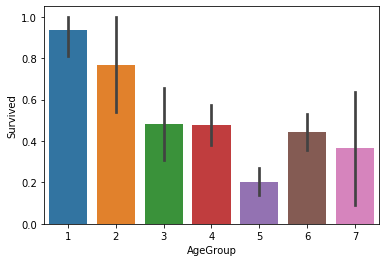

In [16]:
sns.barplot(x="AgeGroup", y="Survived", data=test_results)

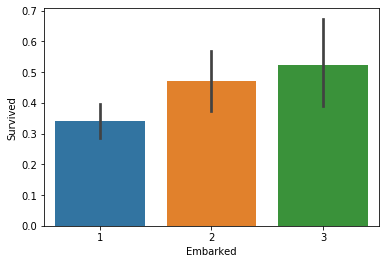

In [17]:
sns.barplot(x="Embarked", y="Survived", data=test_results)
#Southampton (S), Cherbourg (C), Queenstown (Q)

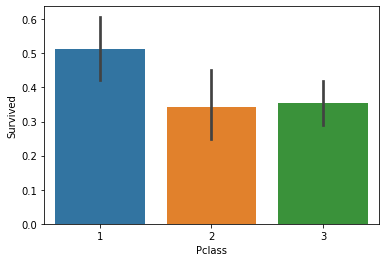

In [18]:
sns.barplot(x="Pclass", y="Survived", data=test_results)